<a href="https://colab.research.google.com/github/sira-code/my_beautiful_repo/blob/master/HEART_PREDICTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('heart_prediction.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range (len(info)):
  print(df.columns[i]+"\t"+info[i])

age	age
sex	1: male, 0: female
cp	chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps	resting blood pressure
chol	 serum cholestoral in mg/dl
fbs	fasting blood sugar > 120 mg/dl
restecg	resting electrocardiographic results (values 0,1,2)
thalach	 maximum heart rate achieved
exang	exercise induced angina
oldpeak	oldpeak = ST depression induced by exercise relative to rest
slope	the slope of the peak exercise ST segment
ca	number of major vessels (0-3) colored by flourosopy
thal	thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
df.target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
df.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [9]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [10]:
df.shape

(303, 14)

In [11]:
df.size

4242

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df['target'].unique()

array([1, 0])

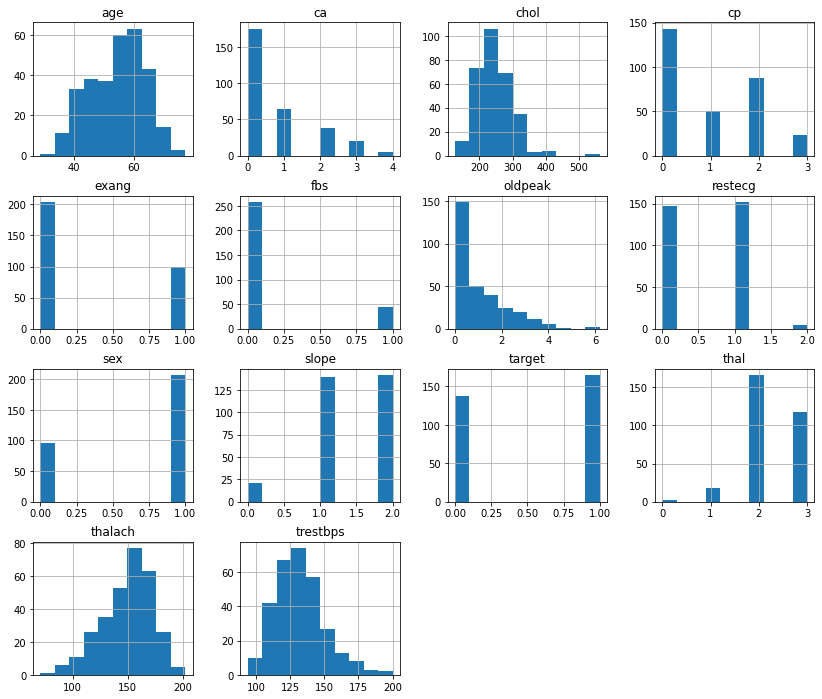

In [14]:
df.hist(figsize=(14,12))
plt.show()

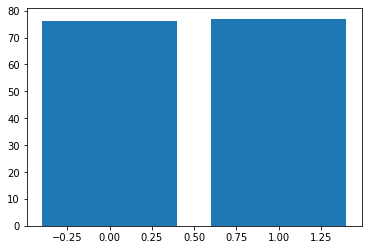

In [15]:
plt.bar(x=df['sex'],height=df['age'])
plt.show()

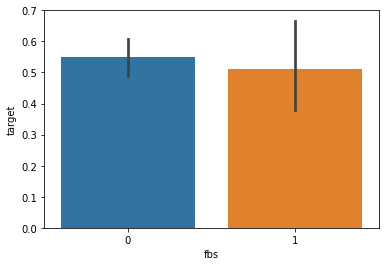

In [16]:
sns.barplot(x="fbs", y="target", data=df)
plt.show()



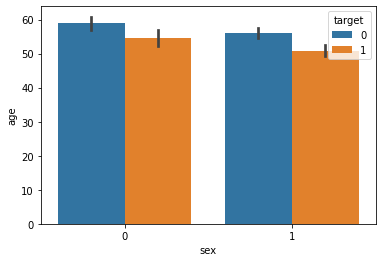

In [17]:
sns.barplot(x=df['sex'],y=df['age'],hue=df['target'])

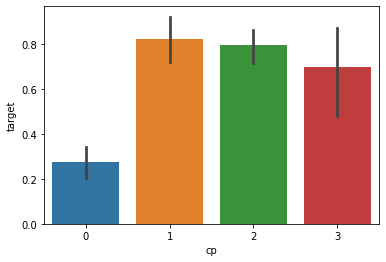

In [18]:
sns.barplot(df["cp"],df['target'])

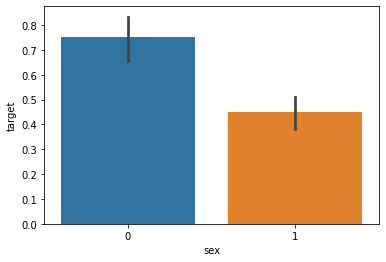

In [19]:
sns.barplot(df["sex"],df['target'])

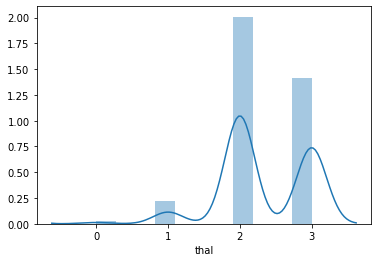

In [20]:
px.bar(df,df['sex'],df['target'])
sns.distplot(df["thal"])



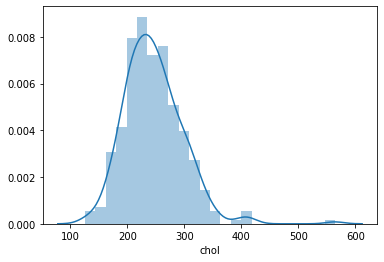

In [21]:
sns.distplot(df["chol"])

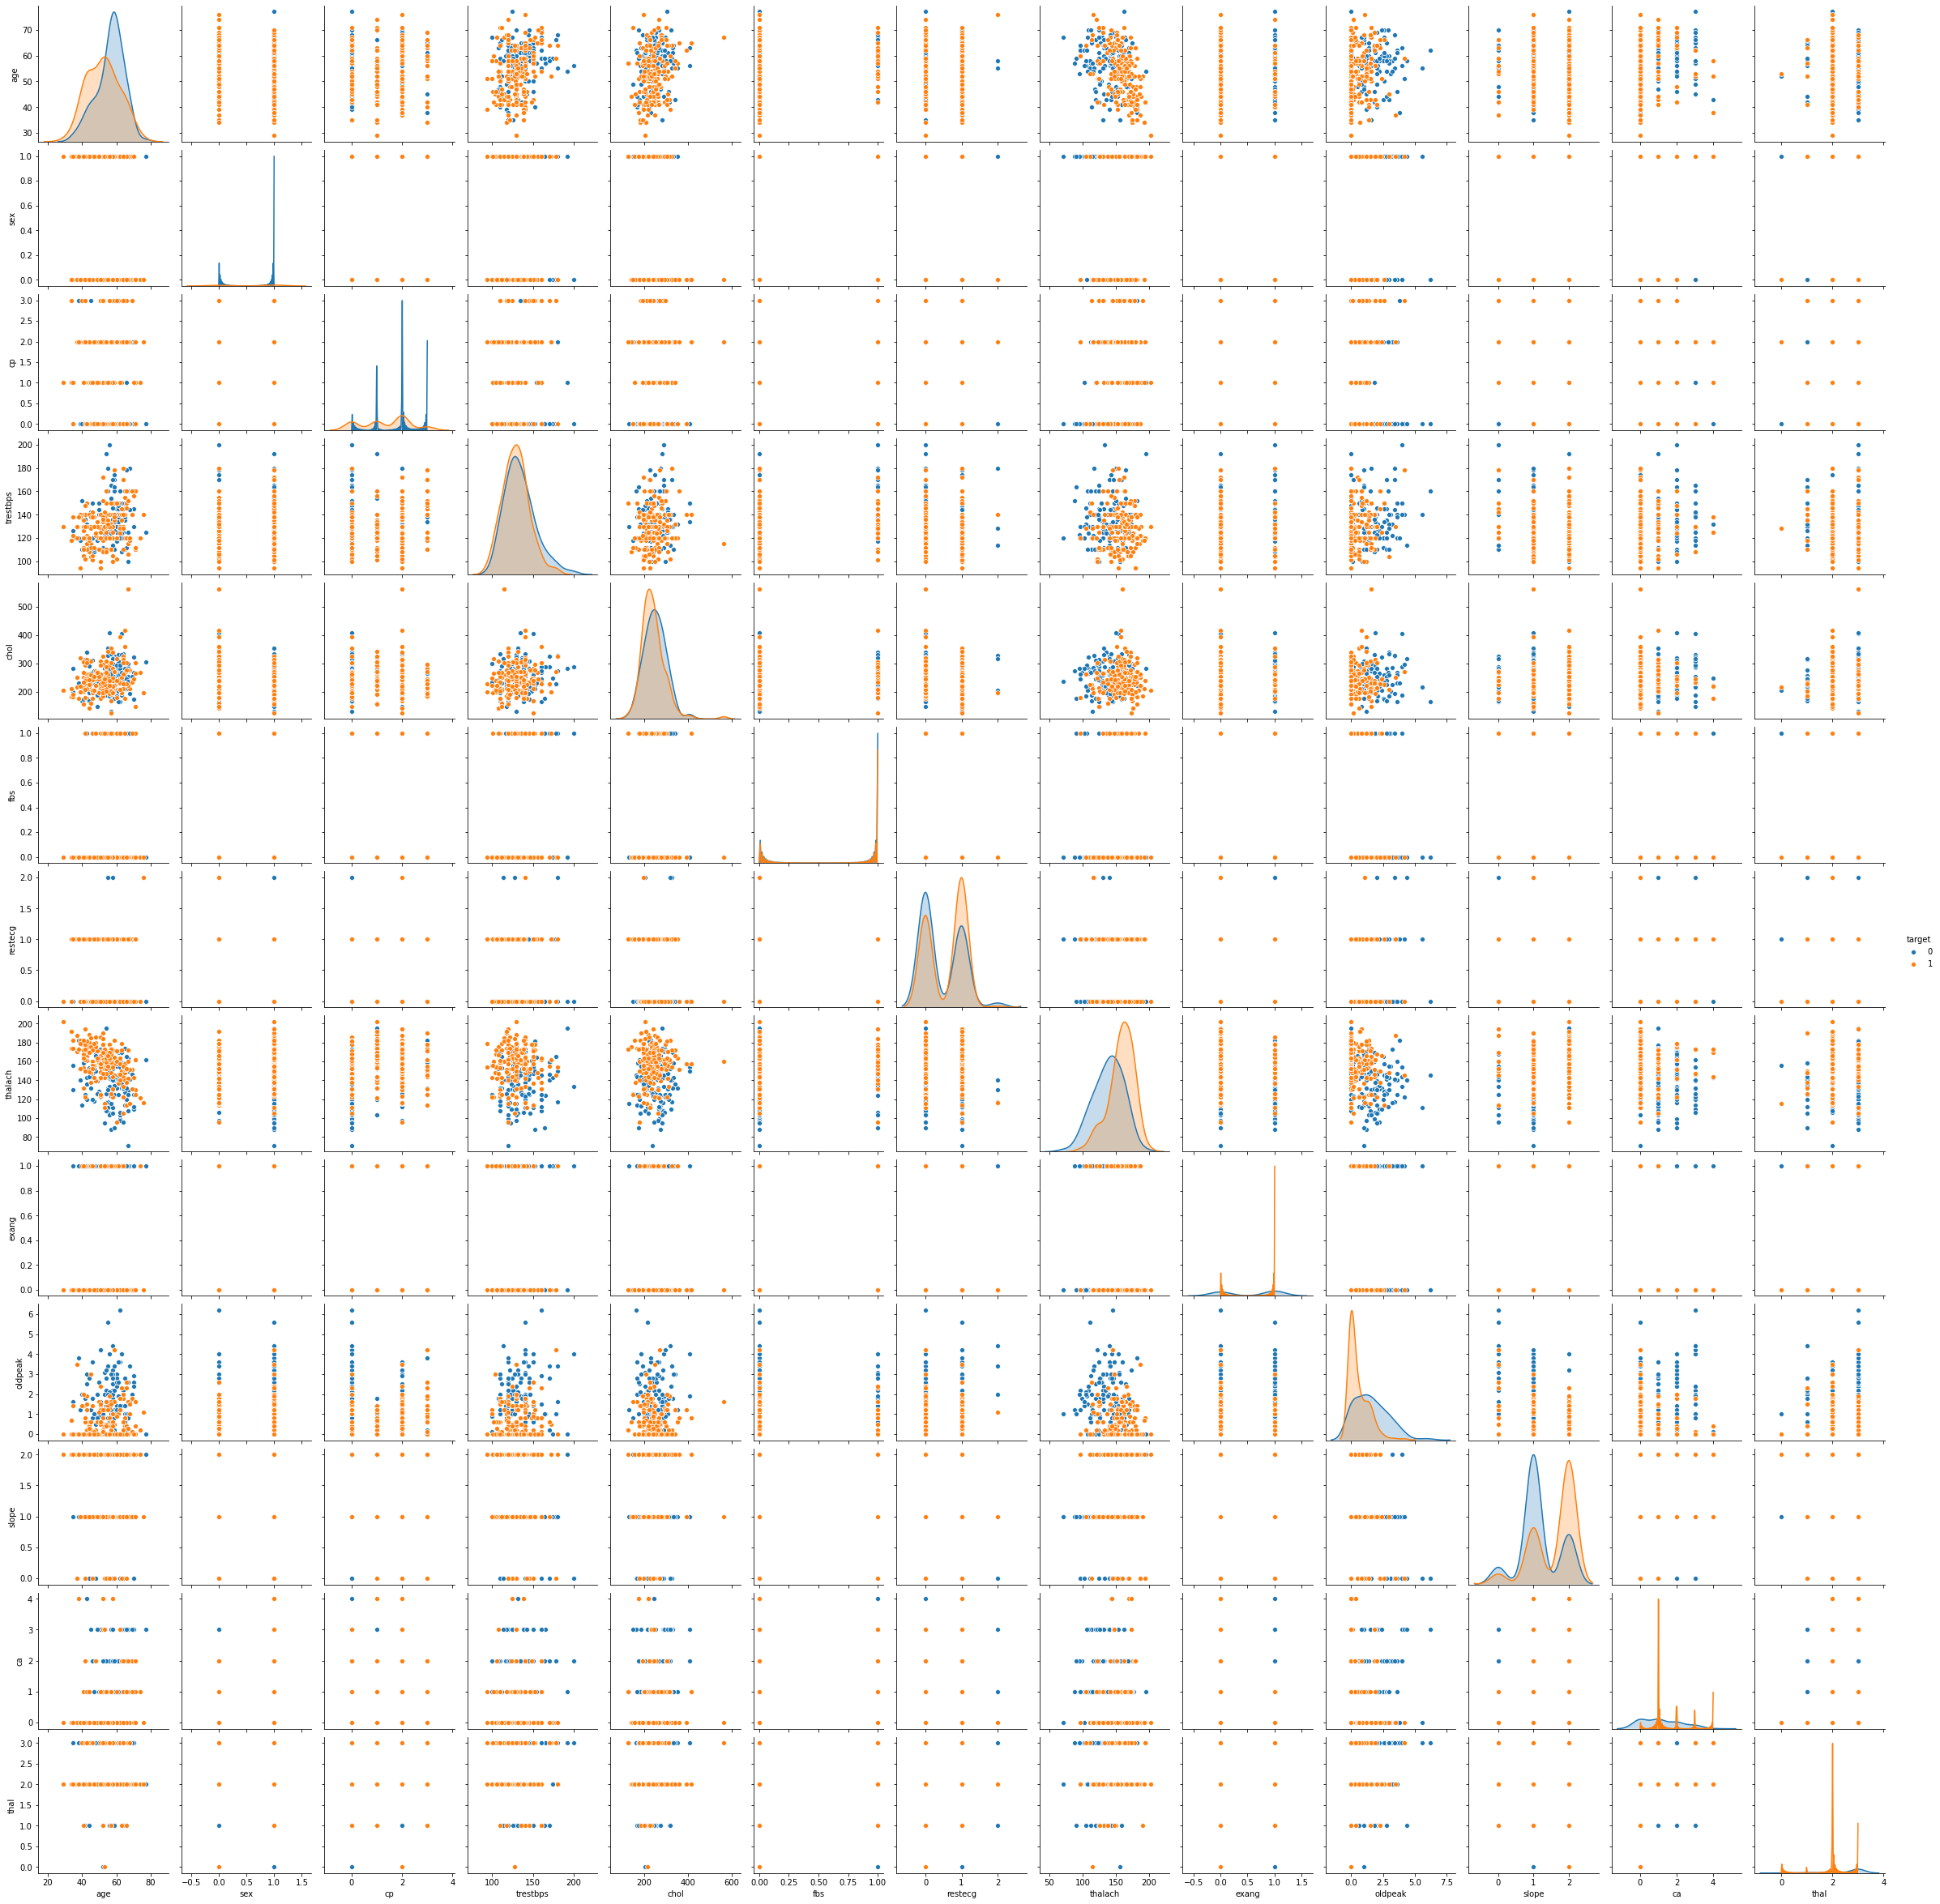

In [22]:
sns.pairplot(df,hue='target')

In [23]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']






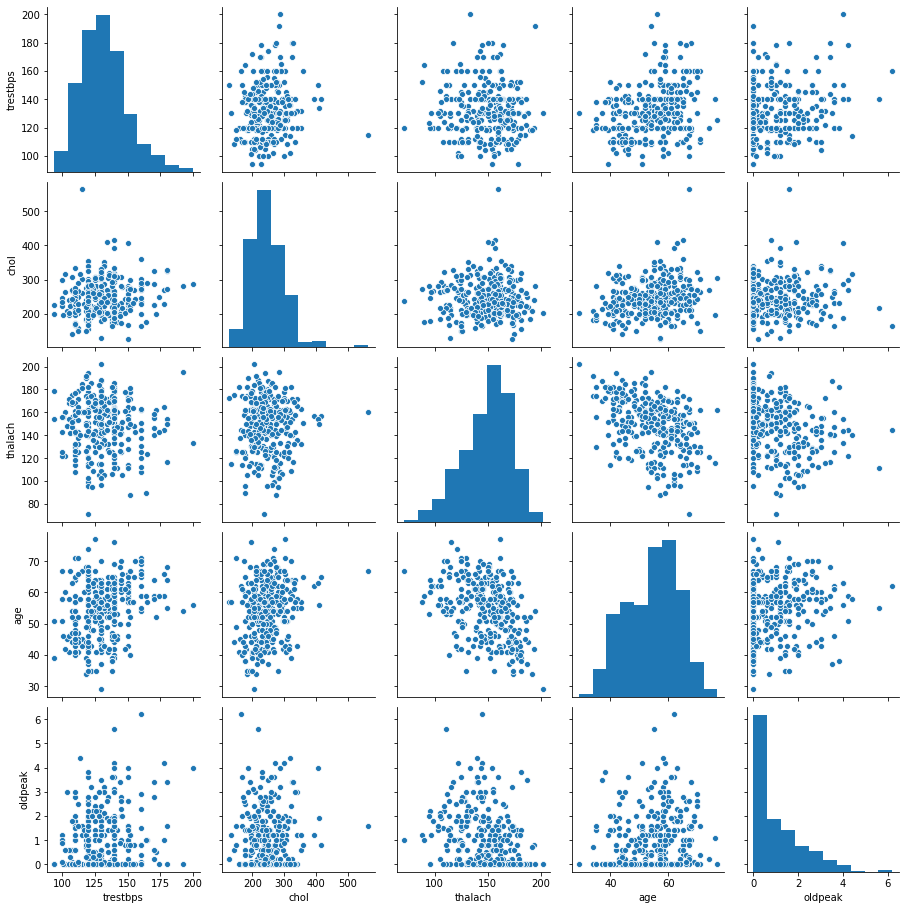

In [25]:
sns.pairplot(df[numeric_columns])



In [26]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

1    165
0    138
Name: target, dtype: int64


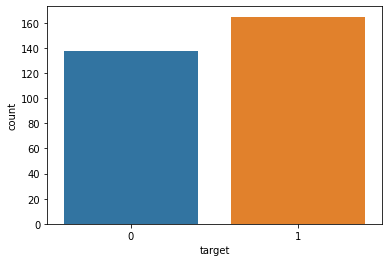

In [27]:
y = df["target"]
sns.countplot(y)
target_temp = df.target.value_counts()
print(target_temp)

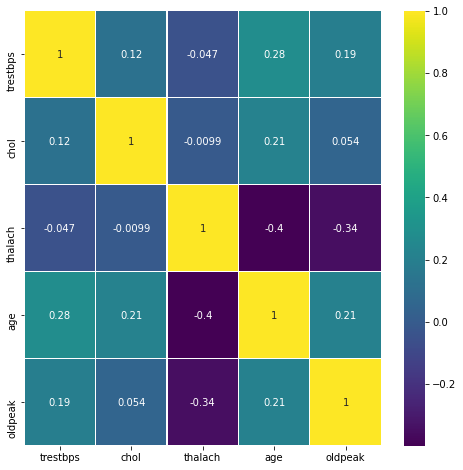

In [28]:
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='viridis', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

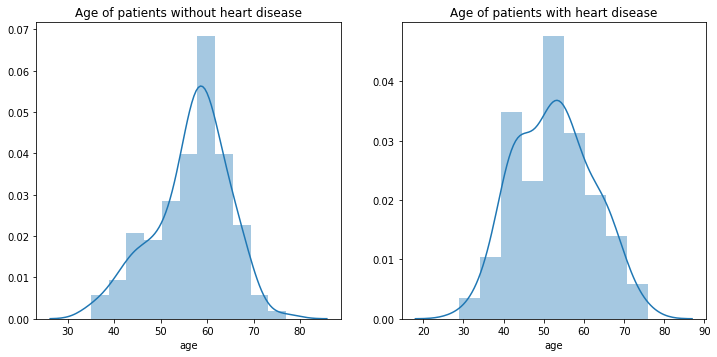

In [29]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.show()

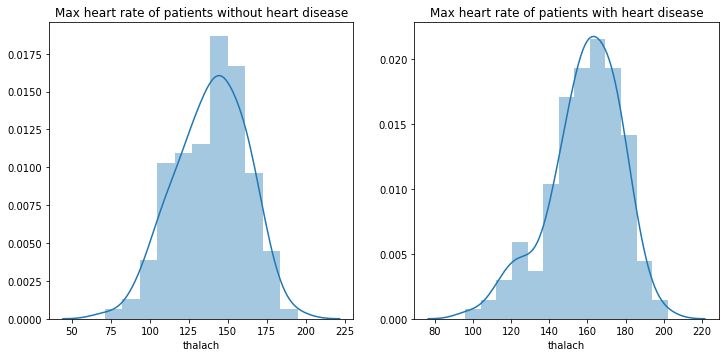

In [30]:
plt.figure(figsize=(12,12))
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

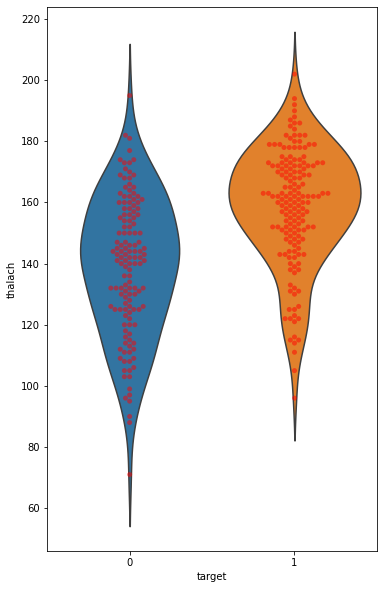

In [31]:
plt.figure(figsize=(13,10))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=df, inner=None)
sns.swarmplot(x="target", y="thalach", data=df, color='r', alpha=0.5)
plt.show()

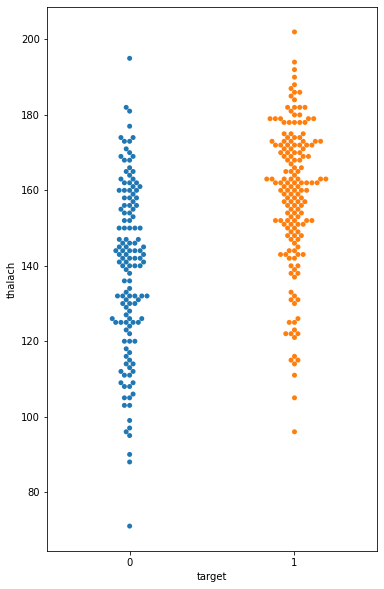

In [32]:
plt.figure(figsize=(13,10))
plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=df)
plt.show()

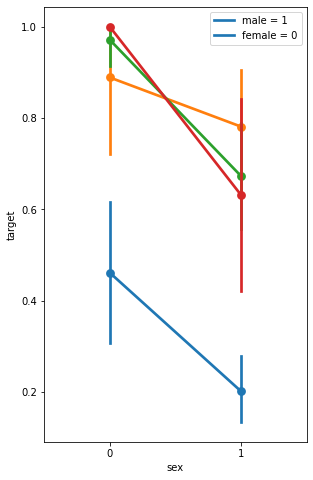

In [33]:
plt.figure(figsize=(16,8))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=df)
plt.legend(['male = 1', 'female = 0'])
plt.show()



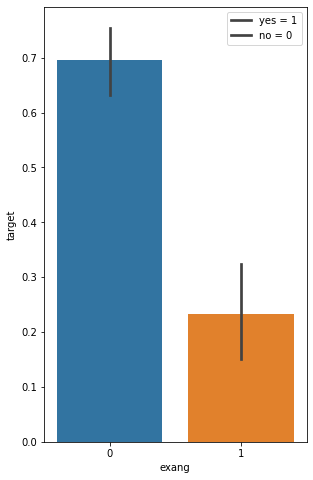

In [34]:
plt.figure(figsize=(16,8))
plt.subplot(132)
sns.barplot(x="exang", y="target", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.show()

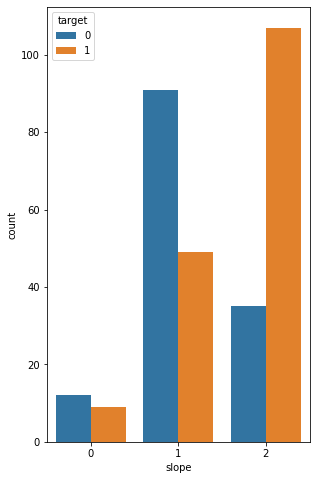

In [35]:
plt.figure(figsize=(16,8))
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=df)
plt.show()

In [36]:
#DATA PREPROCESSING

In [37]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [38]:
df['target'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [39]:
df['target'].sum()



165

In [40]:
df['target'].unique()

array([1, 0])

In [41]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [42]:
#STORING - X and y
X,y=df.loc[:,:'thal'],df.loc[:,'target']



In [43]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [44]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [45]:
X.shape

(303, 13)

In [46]:
y.shape

(303,)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [48]:
X=df.drop(['target'],axis=1)

In [49]:
np.array(X)

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [50]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2,shuffle=True)

In [52]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [53]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
277    0
121    1
187    0
301    0
283    0
Name: target, Length: 61, dtype: int64

In [54]:
X_train.shape

(242, 13)

In [55]:
X_test.shape

(61, 13)

In [56]:
y_train.shape

(242,)

In [57]:
y_test.shape

(61,)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
y_prediction=dt.predict(X_test)



In [60]:
accuracy_dt=accuracy_score (y_test,y_prediction)
accuracy_dt

0.7540983606557377

In [61]:
dt.score(X_train, y_train)

1.0

In [62]:
dt.score(X_test, y_test)

0.7540983606557377

In [63]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
277    0
121    1
187    0
301    0
283    0
Name: target, Length: 61, dtype: int64

In [64]:
y_prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [65]:
X_DT=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_DT_prediction=dt.predict(X_DT)


In [66]:
X_DT_prediction[0]

1

In [67]:
dt.feature_importances_

array([0.03263864, 0.03389848, 0.30021653, 0.11512719, 0.06610428,
       0.        , 0.        , 0.06971741, 0.06558357, 0.10498457,
       0.04826333, 0.163466  , 0.        ])

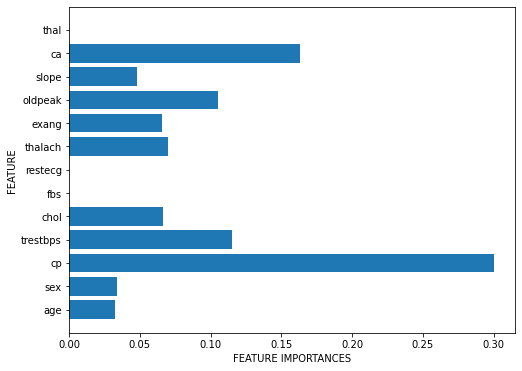

In [68]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("FEATURE IMPORTANCES")
    plt.ylabel("FEATURE")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

In [69]:
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)


In [70]:
X_test_std

array([[ 0.18733254, -1.37147817, -0.96052267,  0.15197298,  3.06663801,
        -0.43159531, -1.01054031, -0.01372906,  1.50674161,  0.7957577 ,
        -0.63678177,  1.30209953,  1.19898626],
       [ 0.40633967,  0.72914029,  0.97653138, -1.06472495, -0.33003859,
        -0.43159531, -1.01054031,  0.6507574 , -0.6636838 ,  1.31881798,
        -0.63678177,  0.30492204,  1.19898626],
       [ 1.06336104,  0.72914029,  0.97653138, -0.34576709,  1.16905332,
        -0.43159531,  0.90001247, -0.85541191,  1.50674161,  0.70858098,
        -0.63678177, -0.69225545,  1.19898626],
       [-0.79819952,  0.72914029, -0.96052267, -1.06472495, -0.82341062,
        -0.43159531,  0.90001247, -0.32382274, -0.6636838 , -0.77342317,
         0.96843894, -0.69225545, -0.43109618],
       [-0.46968884,  0.72914029, -0.96052267,  1.03684419, -0.08335258,
        -0.43159531, -1.01054031, -0.9883092 , -0.6636838 ,  1.4059947 ,
        -0.63678177, -0.69225545,  1.19898626],
       [-1.89323515,  0.729140

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [72]:
prediction_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(y_test,prediction_knn)

In [73]:
accuracy_knn

0.819672131147541

In [74]:
knn.score(X_train, y_train)

0.3884297520661157

In [75]:
knn.score(X_test, y_test)

0.5409836065573771

In [76]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    prediction_knn=knn.predict(X_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [77]:
scores

{1: 0.7704918032786885,
 2: 0.7704918032786885,
 3: 0.8032786885245902,
 4: 0.819672131147541,
 5: 0.8524590163934426,
 6: 0.8524590163934426,
 7: 0.8032786885245902,
 8: 0.7868852459016393,
 9: 0.7868852459016393,
 10: 0.819672131147541,
 11: 0.8032786885245902,
 12: 0.819672131147541,
 13: 0.819672131147541,
 14: 0.8360655737704918,
 15: 0.7868852459016393,
 16: 0.8032786885245902,
 17: 0.8032786885245902,
 18: 0.8032786885245902,
 19: 0.8032786885245902,
 20: 0.8032786885245902,
 21: 0.8032786885245902,
 22: 0.819672131147541,
 23: 0.8032786885245902,
 24: 0.819672131147541,
 25: 0.8032786885245902}

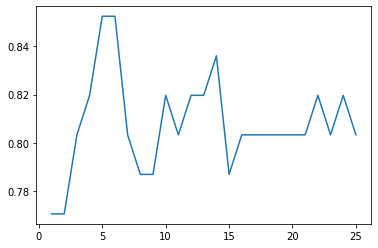

In [78]:
plt.plot(k_range,scores_list)

In [79]:
X_knn=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_knn_std=sc.transform(X_knn)
X_knn_prediction=dt.predict(X_knn)


In [80]:
X_knn_std

array([[ 0.95385748,  0.72914029,  1.9450584 ,  0.76032194, -0.27311105,
         2.31698534, -1.01054031, -0.01372906, -0.6636838 ,  1.14446455,
        -2.24200249, -0.69225545, -2.06117863]])

In [81]:
(X_knn_prediction[0])

1

In [82]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]


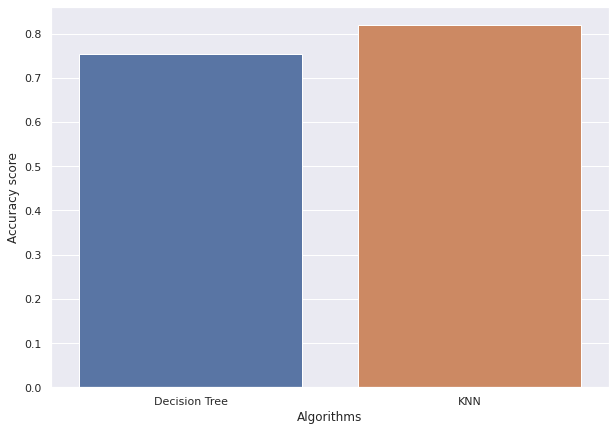

In [83]:
sns.set(rc={'figure.figsize':(10,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)